## Evaluation Bias amongst long-time readers towards favored authors

---

### Introduction

The following notebook is the final submission of DATA 512 project, and it hopes to evaluate and measure the biases amongst reviewers against authors, specifically in the case of Books, sold and reviewed, on Amazon.com .

### Project Goals & Motivation:

The primary objective of the research to evaluate confirmation biases amongst real world users. At this stage, the project aims to develop metrics to aptly identify these biases and their effects. The research's other motive is to create accessible research, that can be understood by experts in fields not related to machine learning.

#### Why this is important?

The internet has become a very nasty place over the years, and co-ordinated efforts to defame/take down a given person are fairly common, for the better or for the for the worse. Online reviews are at the heart of this matter, giving users an inordinate amount of power, which on a daily basis leads to a chaotic mixture of good and bad. On one hand, for example, brands go to extreme end to appease the end user, making the customer the winner. On the other hand, hoards of both ill and well intentioned users online "bomb" a particular target on a daily basis.Borne out of this, is the practice of `de-biasing`, aka removing such biases from a dataset, esp while evaluating entities online that get a large number of reviewers. This project is an extension of this area of research.

--- 

### Research question(s)

__Research Question 1.1: What is the impact of cognition biases amongst reviewers on the author ratings on Amazon__

* __Hypothesis__: Ardent promoters and detractors for an author lead to significant inflated and deflated ratings for the author, and/or their work.

__Research Question 1.2: Building upon RQ1.1, what is the scale of the distortion in user level recommendations__

* __Hypothesis__: The inflated/deflated ratings for particular authors and works lead to significantly distorted recommendations at any point in time.

---
### Data used: 

The partial dataset is the key data source for the project. An extension of the research questions may be applied to the metadata.

Note: The dataset hosted in the project will represented 5% representative sample drawn from the original dataset, after due permission from the team that worked on gathering the source dataset, i.e., Juliam McAuley et al.

The data is split into two parts:
1. __The Review Data__: The key raw fields for the reviews and ratiings
2. __The Metadata__: Aggregated data, containing additional information about the review

A third, more workable dataset called '5-core' is also part of the repository, and is more suited for the analysis:
3. __5-core data__: These data have been reduced to extract the k-core, such that each of the remaining users and items have k reviews each.

The final dataset used for evaliation for the project will only involve a subset of the data from 5-core dataset as well as the metadata dataset, with sample size < 100K reviews. This is because we further only considered books with a higher core, say with 50 reviews, done by reviewers with who’ve written 50 reviews, aka ‘50-core’. This is done on account of the heavy evaluation algorithms involved in the process and limited compute power available.

Furthermore, we will only be considered with __the author, the book, the reviewer and the review score__ for the entirety of this excercise.

#### Sample Review:

In [10]:
{
    "reviewerID": "A2SUAM1J3GNN3B",
    "asin": "0000013714",
    "reviewerName": "J. McDonald",
    "helpful": [2, 3],
    "reviewText": """I bought this for my husband who plays the piano. 
    He is having a wonderful time playing these old hymns.  
    The music  is at times hard to read because we think the book was published for 
    singing from more than playing from.  Great purchase though!""",
    "overall": 5.0,
    "summary": "Heavenly Highway Hymns",
    "unixReviewTime": 1252800000,
    "reviewTime": "09 13, 2009"
}

#### Sample Metadata:

In [ ]:
{
  "asin": "0000031852",
  "title": "Girls Ballet Tutu Zebra Hot Pink",
  "price": 3.17,
  "imUrl": "http://ecx.images-amazon.com/images/I/51fAmVkTbyL._SY300_.jpg",
  "related":
  {
    "also_bought": ["B00JHONN1S", "B002BZX8Z6", "B00D2K1M3O", "0000031909", 
                    "B00613WDTQ", "B00D0WDS9A", "B00D0GCI8S", "0000031895", 
                    "B003AVKOP2", "B003AVEU6G", "B003IEDM9Q", "B002R0FA24",
                    "B00D23MC6W", "B00D2K0PA0", "B00538F5OK", "B00CEV86I6", 
                    "B002R0FABA", "B00D10CLVW", "B003AVNY6I", "B002GZGI4E", 
                    "B001T9NUFS", "B002R0F7FE", "B00E1YRI4C", "B008UBQZKU", 
                    "B00D103F8U", "B007R2RM8W"],
    "also_viewed": ["B002BZX8Z6", "B00JHONN1S", "B008F0SU0Y", "B00D23MC6W", 
                    "B00AFDOPDA", "B00E1YRI4C", "B002GZGI4E", "B003AVKOP2", 
                    "B00D9C1WBM", "B00CEV8366", "B00CEUX0D8", "B0079ME3KU", 
                    "B00CEUWY8K", "B004FOEEHC", "0000031895", "B00BC4GY9Y", 
                    "B003XRKA7A", "B00K18LKX2", "B00EM7KAG6", "B00AMQ17JA", 
                    "B00D9C32NI", "B002C3Y6WG", "B00JLL4L5Y", "B003AVNY6I", 
                    "B008UBQZKU", "B00D0WDS9A", "B00613WDTQ", "B00538F5OK", 
                    "B005C4Y4F6", "B004LHZ1NY", "B00CPHX76U", "B00CEUWUZC", 
                    "B00IJVASUE", "B00GOR07RE", "B00J2GTM0W", "B00JHNSNSM", 
                    "B003IEDM9Q", "B00CYBU84G", "B008VV8NSQ", "B00CYBULSO", 
                    "B00I2UHSZA", "B005F50FXC", "B007LCQI3S", "B00DP68AVW", 
                    "B009RXWNSI", "B003AVEU6G", "B00HSOJB9M", "B00EHAGZNA", 
                    "B0046W9T8C", "B00E79VW6Q", "B00D10CLVW", "B00B0AVO54", 
                    "B00E95LC8Q", "B00GOR92SO", "B007ZN5Y56", "B00AL2569W", 
                    "B00B608000", "B008F0SMUC", "B00BFXLZ8M"],
    "bought_together": ["B002BZX8Z6"]
  },
  "salesRank": {"Toys & Games": 211836},
  "brand": "Coxlures",
  "categories": [["Sports & Outdoors", "Other Sports", "Dance"]]
}

---

### Background research and related work

[De-biasing](https://en.wikipedia.org/wiki/Debiasing) is a rich research field. It is the study of techniques to detect, avoid and account for errors in judgement, intentional or unintentional. Ideally, there are three approaches to this: changing incentives, nudging, and training. 

---

### Ethical Considerations:

Since we intend to figure out distortions

---

### Methodology:

The workload here can be shifted into 
Highlight Ardent Promoters and Detractors for each work (author-book)
Metric: 
Reviewers that rated highly positive or very negative for more than 80% on a particular book.
How: 
- K-Means clusters for items enough data available for 3 distinct clusters per book per author
- Measure the changes in ratings upon removal of the highlighted book-reviewer combo


---

#### 1. Data Gathering

In [572]:
import os
import ast
import csv
import gzip
import json
import time
import random
import shutil
import requests

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from matplotlib import pyplot 

In [2]:
COREDATA="http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/Books_5.json.gz"

In [3]:
def download_file(url, data_loc):
    """ Stores and streams and
    """
    
    local_filename = data_loc+url.split('/')[-1]
    if os.path.exists(local_filename):
        return local_filename
        
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            shutil.copyfileobj(r.raw, f)
    r.close()
    return local_filename

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        t=str(l)
        yield json.dumps(t)

def filer_man(path: str, zip_path: str, mode: str, headers: list):
    main_dict={}
    i=0
    with open(path, mode) as f:
        for line in parse(zip_path):
            dict_line = json.loads(ast.literal_eval(eval(line)))
            main_dict[i] = {k:v for k, v in dict_line.items() if k in headers}
            if mode=='w':
                f.write(line+'\n')
            i+=1
    return main_dict

def read_and_store(url: str, data_loc='data/', **kwargs):
    headers = kwargs.get('headers', None)
    
    if not headers:
        print("NEED TO SELECT HEADERS!")
        return None
    
    local_filename = download_file(url, data_loc)
    unzip_filename = local_filename.replace('.gz', '')
    
    if os.path.exists(unzip_filename):
        main_dict = filer_man(unzip_filename, local_filename, 'r', headers=[])
        return select_df(pd.DataFrame.from_dict(main_dict, orient='index'), headers)
    main_dict=filer_man(unzip_filename, local_filename, 'w')
    
    return select_df(pd.DataFrame.from_dict(main_dict, orient='index'), headers)
    

In [3]:
headers = set(['asin', 'reviewerID', 'vote', 'overall'])

file_name = "data/Books_5.json.gz"
lines = (line for line in gzip.open(file_name, 'r'))
# json_lines = (json.dumps(str(l)) for l in lines if random.random()>0.95)
json_lines = (json.dumps(str(l)) for l in lines)
dict_line = (json.loads(ast.literal_eval(eval(s))) for s in json_lines)

final_tuple = ((item.get(k,'') for k in headers) for item in dict_line) 
f = open('data/Books_5.csv', 'a+')
wr = csv.writer(f)
wr.writerow(headers)
k=0
start_time = time.time()
for i in final_tuple:
    k+=1
    if k%1e6 == 0:
        elapsed_time = round(time.time() - start_time)
        print(str(round(k//1e6)) + ' Mn done in ' + str(elapsed_time) + ' seconds')
    wr.writerow(list(i))
elapsed_time = round(time.time() - start_time)
print('total time:' + str(elapsed_time) + ' seconds')
f.close()

In [56]:
USERREVIEWCUTOFF=7
BOOKREVIEWCUTOFF=7

countSeries = booksdf.asin.value_counts()
booksdf['totalReviews'] = booksdf.asin.map(countSeries)
booksdf=booksdf[booksdf.totalReviews>BOOKREVIEWCUTOFF].reset_index(drop=True)

countSeries = booksdf.reviewerID.value_counts()
booksdf['totalUserReviews'] = booksdf.reviewerID.map(countSeries)
booksdf=booksdf[booksdf.totalUserReviews>USERREVIEWCUTOFF].reset_index(drop=True)

---

#### 2. Cluster Analysis

In [ ]:
def km(X: pandas.DataFrame):
    """
    K means function
    
    :params: X
    
    :returns: pandas.Series
    
    
    """
    
    if len(X) > 3:
        clusterer = KMeans(3)

        clusterer.fit(np.array(X).reshape(-1,1))

        Y=clusterer.predict(np.array(X).reshape(-1,1))
    else:
        return pd.Series(data=[None]*len(X),
                         index=X)
    
    
    if len(set(Y))==3:
        return pd.Series(data=Y,
                         index=X)
    else:
        return pd.Series(data=[None]*len(X),
                         index=X)

In [58]:
smallerbooksdf = booksdf

In [59]:
smallerbooksdf.shape

(4773, 6)

In [60]:
smallerbooksdf.drop(['vote', 'totalReviews', 'totalUserReviews'], axis=1, inplace=True)
smallerbooksdf.head()

,overall,asin,reviewerID
0,5.0,0001844423,A1D2C0WDCSHUWZ
1,4.0,0001844423,A96K1ZGW56S2I
2,5.0,0001844423,A1D2C0WDCSHUWZ
3,5.0,0001048767,A1D2C0WDCSHUWZ
4,5.0,0001048767,A2YXRT2XIJIO57


In [63]:


clusterseries = smallerbooksdf\
    .groupby('asin')['overall']\
    .apply(lambda x: km(x))\
    .reset_index()\
    .dropna(subset=['overall'])\
    .overall

In [769]:
smallerbooksdf = smallerbooksdf.merge(clusterseries, how='left', left_index=True, right_index=True)\
    .rename(columns={'overall_x': 'overall', 'overall_y': 'cluster'})

In [770]:
smallerbooksdf.shape

(67667, 4)

In [4]:
metadata=pd.read_csv('data/meta_Books.csv', index_col='asin')
smallerbooksdf = smallerbooksdf.merge(metadata['brand'],left_on='asin', right_index=True)

In [71]:
def user_check(x, check=0.8):
    
    cnt = len(x)
    y = [0]*cnt
    
    cnt0 = len([i for i in x if i==0])
    if cnt0 > round(check*cnt):
        y = [1 if i==0 else i for i in y]
    
    cnt2 = len([i for i in x if i==2])
    if cnt2 > round(check*cnt):
        y = [1 if i==2 else i for i in y]
    
    return pd.Series(data=y,index=x)

In [72]:
checkseries = smallerbooksdf.\
    groupby('asin')['cluster'].\
    apply(lambda x: user_check(x)).\
    reset_index().\
    cluster

In [73]:
smallerbooksdf = smallerbooksdf.merge(checkseries, left_index=True, right_index=True)\
    .rename(columns={'cluster_x':'cluster', 'cluster_y': 'highlight'})

In [79]:
smallerbooksdf.highlight = [1 if random.random() > 0.97 else 0 for i in range(smallerbooksdf.shape[0])]

In [68]:
smallerbooksdf.groupby(['cluster'])[['overall']].agg(['mean', 'std', 'count']).reset_index().to_csv('temp.csv')

In [82]:
smallerbooksdf['asin2'] = pd.factorize(smallerbooksdf.asin)[0]+1
smallerbooksdf['reviewerID2'] = pd.factorize(smallerbooksdf.reviewerID)[0]+1

---
#### 3. Distortion Calculations

In [129]:
n_users=smallerbooksdf.reviewerID.unique().shape[0]
n_items=smallerbooksdf.asin.unique().shape[0]


ratings = np.zeros((n_users, n_items))
for row in smallerbooksdf.itertuples():
    ratings[row[8]-1, row[7]-1] = row[1]
ratings

array([[5., 5., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 5., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 0.63%


In [131]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], 
                                        size=5, 
                                        replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [132]:
train, test = train_test_split(ratings)

In [133]:
movie_dict=dict(zip(smallerbooksdf.asin2-1,
                   smallerbooksdf.asin))

In [134]:
def fast_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [135]:
user_similarity=fast_similarity(ratings, kind='item')
item_similarity=fast_similarity(ratings, kind='item')

In [137]:
def predict_topk(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
    if kind == 'item':
        for j in range(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))        
    
    return pred

In [138]:
def top_k_books(similarity, mapper, movie_idx, k=10):
    top_books = [mapper[x] for x in np.argsort(similarity[movie_idx,:])[:-k-1:-1]]
    top_books = set(top_books)
    return top_books

In [139]:
# temporary saving file

smallerbooksdf.to_csv('results/prelim_results.csv', index=False) 

In [140]:
smallerbooksdf['main_suggestions']=smallerbooksdf.asin2.\
    map(lambda x: top_k_books(item_similarity, mapper=movie_dict, movie_idx=x-1))

In [176]:

smallerbooksdf['second_suggestions']=smallerbooksdf.asin2.\
    map(lambda x: top_k_books(item_similarity2, mapper=movie_dict, movie_idx=x-1))

In [184]:
final_results = []
for x, y in zip(smallerbooksdf['main_suggestions'], smallerbooksdf['second_suggestions']):
    final_results+=[1-len(x.intersection(y))/len(x)]

In [186]:
final_results

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.19999999999999996,
 0.19999999999999996,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.0,
 0.0,
 0.19999999999999996,
 0.19999999999999996,
 0.9,
 0.09999999999999998,
 0.09999999999999998,
 0.30000000000000004,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09999999999999998,
 0.09999999999999998,
 0.0,
 0.0,
 0.0,
 1.0,
 0.19999999999999996,
 0.09999999999999998,
 0.09999999999999998,
 0.0,
 0.09999999999999998,
 0.19999999999999996,
 0.19999999999999996,
 0.19999999999999996,
 0.09999999999999998,
 0.19999999999999996,
 0.0,
 0.09999999999999998,
 0.0,
 0.099999999

(array([3704.,  674.,    0.,  134.,   50.,   93.,   19.,    0.,   81.,
          20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

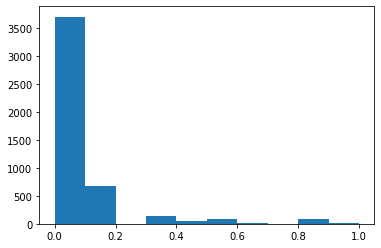

In [190]:
pyplot.hist(final_results)

In [191]:
np.mean(final_results)

0.11302617801047118

In [192]:
np.std(final_results)

0.15392237911087378

---

### Findings, implications, and limitations:

---
### Reflection:

---

### References:

1. Justifying recommendations using distantly-labeled reviews and fined-grained aspects (Data Source)
Jianmo Ni, Jiacheng Li, Julian McAuley
_Empirical Methods in Natural Language Processing (EMNLP), 2019_, [pdf](http://cseweb.ucsd.edu/~jmcauley/pdfs/emnlp19a.pdf)